In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
B = np.array([[4, -2], [-2, 4]])
a = np.array([0, 1]).reshape(2,1)
b = np.array([-2, 1]).reshape(2,1)
c = np.array([-0.6,-0.4]).reshape(2,1)
C = np.array([[3,-2],[-2,3]])
#define the three functions, input is limited to a 2x1 column vector
f1 = lambda x: x.T@B@x-x.T@x+a.T@x-b.T@x
f2 = lambda x: np.cos((x-b).T@(x-b))+(x-a).T@B@(x-a)
f3 = lambda x: 1 - (np.exp(-(x-a).T@(x-a)) + np.exp(-(x-b).T@B@(x-b)) - 0.1*np.log(np.linalg.det(0.01*np.identity(2)+x@x.T)))

In [7]:
f3(np.array([0.3, 0]).reshape(2,1)).sum()

-0.026992021604948402

In [8]:
# def grad_f1(x):
#     grad_0 = 6*x[0]-4*x[1]+2
#     grad_1 = 6*x[1]-4*x[0]
#     return np.array([grad_0, grad_1])

def grad_f1(x):
    x_vector = x.reshape(2,1)
    gradient = 2*(x_vector-c).T@C
    return gradient.flatten()

In [9]:
int(np.round_(grad_f1(np.array([-0.6,-0.4])),2)[1])

0

In [10]:
grad_f1(np.array([-0.6,-0.4]))

array([0., 0.])

In [11]:
# def grad_f2(x):
#     grad_0 = 4*(2*x[0]-x[1]+1)-2*(x[0]+2)*np.sin((x[0]+2)**2+(x[1]-1)**2)
#     grad_1 = 4*(2*x[1]-x[0]-2)-2*(x[1]-1)*np.sin((x[0]+2)**2+(x[1]-1)**2)
#     return np.array([grad_0, grad_1])

def grad_f2(x):
    x_vector = x.reshape(2,1)
    gradient = -2*np.sin((x_vector-b).T@(x_vector-b))@(x_vector-b).T + 2*(x_vector-a).T@B
    return gradient.flatten()

In [12]:
grad_f2(np.array([-0.6,-0.4])).shape

(2,)

In [13]:
# def grad_f3(x):
#     x_vector = x.reshape(2,1)
#     gradient = 2*np.exp(-(x_vector-a).T@(x_vector-a))@(x_vector-a).T 
#     + 2*np.exp(-(x_vector-b).T@B@(x_vector-b))@(x_vector-b).T@B 
#     + (20/(100*(x[0]**2+x[1]**2)+1))*x_vector.T
#     return gradient.flatten()

def grad_f3(x):
    x_vector = x.reshape(2,1)
    gradient = 2*np.exp(-(x_vector-a).T@(x_vector-a))@(x_vector-a).T + 2*np.exp(-(x_vector-b).T@B@(x_vector-b))@(x_vector-b).T@B + (20/(100*(x[0]**2+x[1]**2)+1))*x_vector.T
    return gradient.flatten()

In [14]:
grad_f3(np.array([0.3,0]))

array([ 0.8017299 , -0.67243299])

In [68]:
def gradient_descent(function, grad_function, starting_point, step_size, iterations):
    #initialize the input matrix with desired dimensions
    x_inputs = np.zeros(iterations*2).reshape(iterations,2,1)
    x_inputs[0] = starting_point.reshape(2,1)
    for i in range(iterations):
        if i > 0:
            x_inputs[i] = x_inputs[i-1] - step_size*(grad_function(x_inputs[i-1].reshape(2,)).reshape(2,1))
    final_input = x_inputs[-1]
    local_minimum = function(x_inputs[-1]).sum()
    print(f"local minimum of the function is found to be {np.round_(local_minimum,4)}, occuring at the input x of {np.round_(final_input,4)}.")
#     trace = []
#     for array in x_inputs:
#         trace.append((array.reshape(2,)[0], array.reshape(2,)[1]))
    return x_inputs

In [69]:
def plot_contours(function, inputs_array, multiplier=1.5, function_name='the function'):
    x1 = np.linspace(-inputs_array[-1][0] * multiplier, inputs_array[-1][0] * multiplier, 100)
    x2 = np.linspace(-inputs_array[-1][1] * multiplier, inputs_array[-1][1] * multiplier, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = np.zeros(shape=(x1.size, x2.size))
    for i, val1 in enumerate(x1):
        for j, val2 in enumerate(x2):
            Y[i,j] = function(np.array([val1, val2]).reshape(2,1)).sum()
    #get the trace of all steps of GD
    trace = []
    for array in inputs_array:
        trace.append((array.reshape(2,)[0], array.reshape(2,)[1]))
    fig0 = plt.figure()
    plt.contourf(X1, X2, Y, alpha=0.7)
    CS = plt.contour(X1, X2, Y, linestyles='dashed', linewidths=1, colors='black')
    plt.clabel(CS, inline=1, fontsize=8)
    fig0.gca().add_patch(plt.Polygon(trace, closed=None, fill=None, edgecolor='y'))
    plt.scatter(inputs_array[-1][0], inputs_array[-1][1], c='red')   #annotate the end point with a red dot
    plt.title(f"Contour plot of gradient descent for {function_name}, found minimum is {np.round_(function(inputs_array[-1]).sum(), 5)}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

local minimum of the function is found to be -0.6, occuring at the input x of [[-0.6]
 [-0.4]].


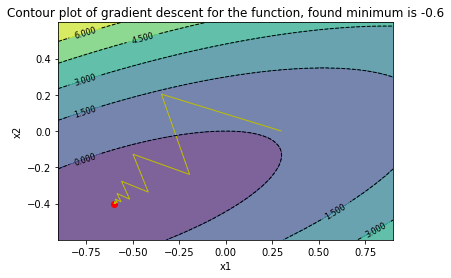

In [100]:
plot_contours(f1, gradient_descent(f1, grad_f1, np.array([0.3,0]), 0.17, 50))

local minimum of the function is found to be -0.8922, occuring at the input x of [[-0.1564]
 [ 0.9266]].


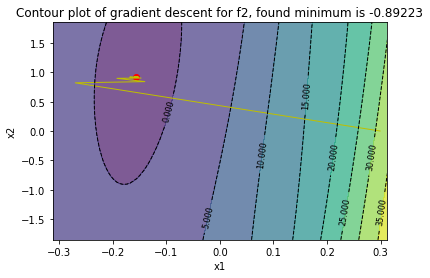

In [97]:
plot_contours(f2, gradient_descent(f2, grad_f2, np.array([0.3,0]), 0.07, 50), multiplier=2, function_name='f2')

local minimum of the function is found to be -0.4698, occuring at the input x of [[-0.0254]
 [ 0.8873]].


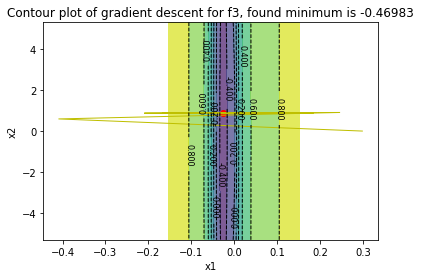

In [101]:
plot_contours(f3, gradient_descent(f3, grad_f3, np.array([0.3,0]), 0.885, 50), multiplier=6, function_name='f3')

In [21]:
f3(np.array([0.3,0]).reshape(2,1))

array([[-0.02699202]])